In [4]:
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# lecture CSV (attention au codage du fichier !)
data = pd.read_csv("datasetsoperations_enrichies_perso.csv",parse_dates=[0],sep= ';',decimal= ',', dayfirst=True)
#data.columns = ['date_operation','libelle','montant','credit','solde_avt_ope','categ','type',
#               'tranche_depense','sens','annee','mois','jour','jour_sem','jour_sem_num','weekend','quart_mois' ]
#print(data)
#print (data.dtypes)

#Correction d'un probleme a la lecture du CSV : non reconnaissance des montant comme chiffre
data['montant'] = pd.to_numeric(data['montant'])
data['solde_avt_ope'] = pd.to_numeric(data['montant'])
#print (data.dtypes)

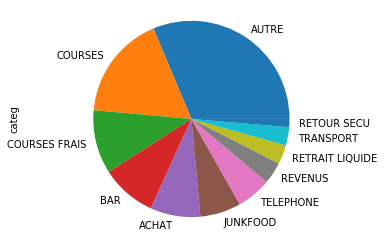

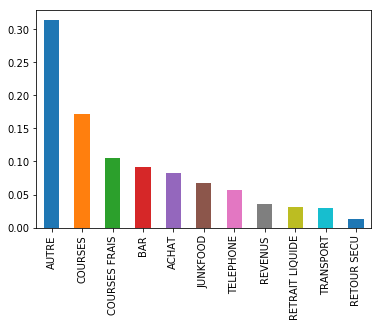

In [6]:
# VARIABLE QUALITATIVE
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique


# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

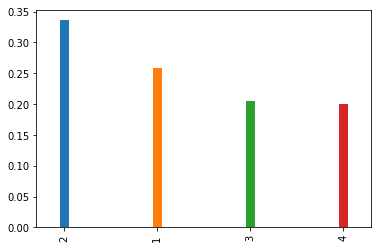

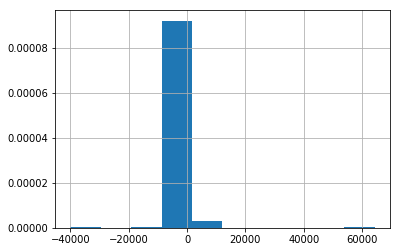

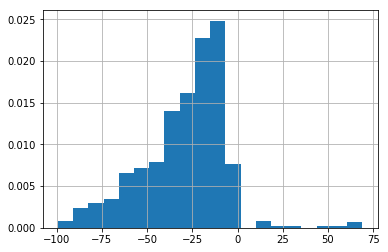

In [8]:
# VARIABLE QUANTITATIVE
# Diagramme en bâtons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

# Histogramme
data["montant"].hist(density=True)
plt.show()
# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

In [30]:
effectifs = data["quart_mois"].value_counts()
print(effectifs)
modalites = effectifs.index # l'index de effectifs contient les modalités
print(modalites)
tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

tab = tab.sort_values("quart_mois") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
print(tab)


2    224
1    172
3    137
4    134
Name: quart_mois, dtype: int64
Int64Index([2, 1, 3, 4], dtype='int64')
   quart_mois    n         f         F
1           1  172  0.257871  0.257871
0           2  224  0.335832  0.593703
2           3  137  0.205397  0.799100
3           4  134  0.200900  1.000000


--------------------
COURSES FRAIS
moy:
 -27.905571428571417
med:
 -26.89
mod:
 0   -27.67
dtype: float64


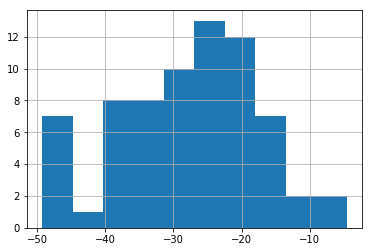

--------------------
REVENUS
moy:
 1715.3187500000004
med:
 1762.04
mod:
 0    1762.04
dtype: float64


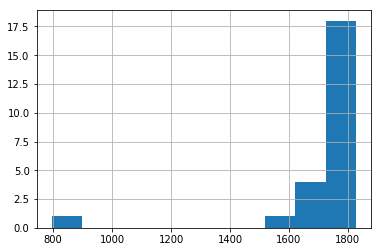

--------------------
AUTRE
moy:
 -72.19727272727268
med:
 -28.0
mod:
 0   -1.6
dtype: float64


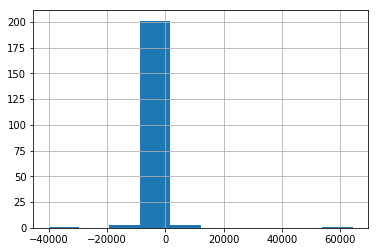

--------------------
COURSES
moy:
 -45.19904347826086
med:
 -38.55
mod:
 0   -63.17
dtype: float64


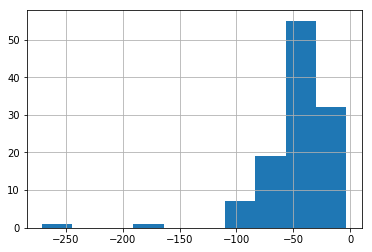

--------------------
JUNKFOOD
moy:
 -18.15333333333334
med:
 -14.5
mod:
 0   -9.5
1   -9.4
dtype: float64


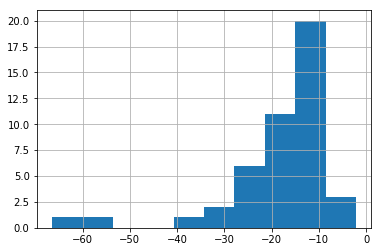

--------------------
BAR
moy:
 -17.383606557377046
med:
 -15.0
mod:
 0   -21.0
dtype: float64


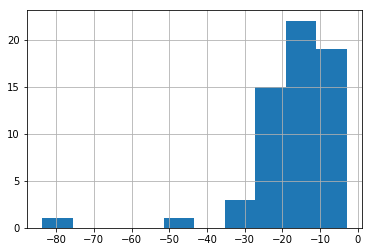

--------------------
ACHAT
moy:
 -68.18018181818182
med:
 -40.0
mod:
 0   -100.0
dtype: float64


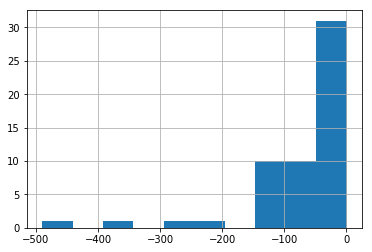

--------------------
TRANSPORT
moy:
 -61.62450000000001
med:
 -62.03
mod:
 0    -86.40
1    -85.48
2    -82.22
3    -79.98
4    -76.46
5    -76.00
6    -72.03
7    -64.54
8    -64.20
9    -63.30
10   -60.76
11   -60.70
12   -52.97
13   -51.70
14   -50.08
15   -49.92
16   -49.56
17   -43.00
18   -41.79
19   -21.40
dtype: float64


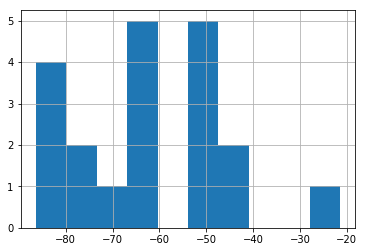

--------------------
RETRAIT LIQUIDE
moy:
 -73.33333333333333
med:
 -60.0
mod:
 0   -60.0
dtype: float64


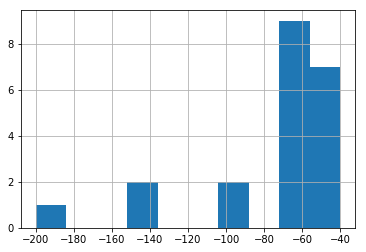

--------------------
TELEPHONE
moy:
 -15.519210526315794
med:
 -10.0
mod:
 0   -10.0
dtype: float64


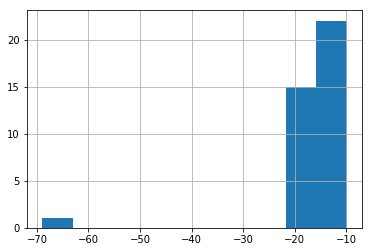

--------------------
RETOUR SECU
moy:
 11.753333333333334
med:
 16.5
mod:
 0   -29.24
1   -26.67
2    11.50
3    12.50
4    16.50
5    17.32
6    22.57
7    31.57
8    49.73
dtype: float64


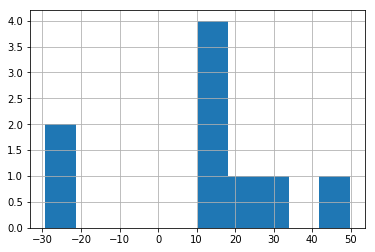

In [41]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean()) #Moyenne
    print("med:\n",subset['montant'].median()) #Mediane : 50% des valeurs
    print("mod:\n",subset['montant'].mode()) #Mode : valeur la plus frequente
    subset["montant"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme

--------------------
COURSES FRAIS
moy:
 -27.905571428571417
med:
 -26.89
mod:
 0   -27.67
dtype: float64
var:
 102.56713324489795
ect:
 10.127543297606678


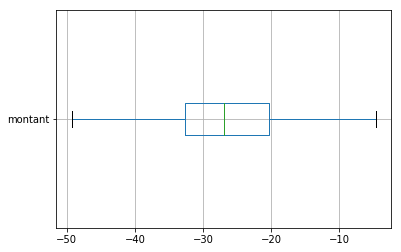

--------------------
REVENUS
moy:
 1715.3187500000004
med:
 1762.04
mod:
 0    1762.04
dtype: float64
var:
 40212.85630260416
ect:
 200.53143469941105


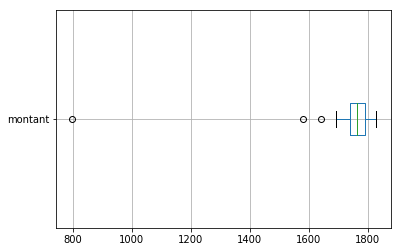

--------------------
AUTRE
moy:
 -72.19727272727268
med:
 -28.0
mod:
 0   -1.6
dtype: float64
var:
 30009126.756182484
ect:
 5478.058666734273


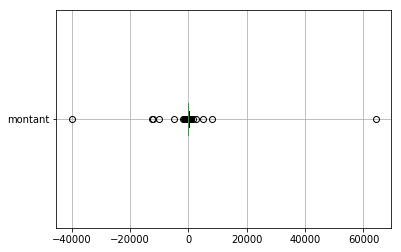

--------------------
COURSES
moy:
 -45.19904347826086
med:
 -38.55
mod:
 0   -63.17
dtype: float64
var:
 1047.1518695198488
ect:
 32.35972604210129


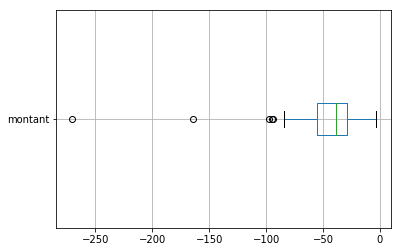

--------------------
JUNKFOOD
moy:
 -18.15333333333334
med:
 -14.5
mod:
 0   -9.5
1   -9.4
dtype: float64
var:
 136.7514888888889
ect:
 11.694079223645138


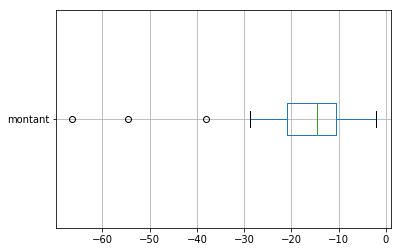

--------------------
BAR
moy:
 -17.383606557377046
med:
 -15.0
mod:
 0   -21.0
dtype: float64
var:
 124.77022305831765
ect:
 11.170059223581479


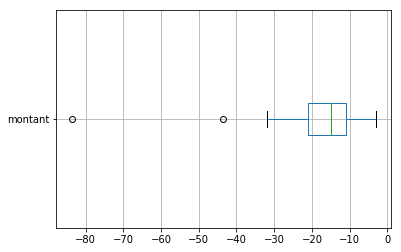

--------------------
ACHAT
moy:
 -68.18018181818182
med:
 -40.0
mod:
 0   -100.0
dtype: float64
var:
 8194.243819966941
ect:
 90.52206261440877


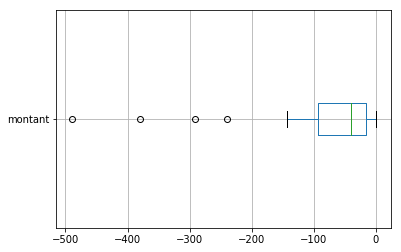

--------------------
TRANSPORT
moy:
 -61.62450000000001
med:
 -62.03
mod:
 0    -86.40
1    -85.48
2    -82.22
3    -79.98
4    -76.46
5    -76.00
6    -72.03
7    -64.54
8    -64.20
9    -63.30
10   -60.76
11   -60.70
12   -52.97
13   -51.70
14   -50.08
15   -49.92
16   -49.56
17   -43.00
18   -41.79
19   -21.40
dtype: float64
var:
 272.30411475000005
ect:
 16.50163975942997


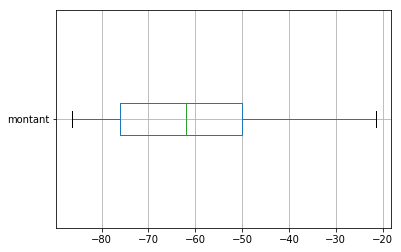

--------------------
RETRAIT LIQUIDE
moy:
 -73.33333333333333
med:
 -60.0
mod:
 0   -60.0
dtype: float64
var:
 1774.6031746031745
ect:
 42.126039151612325


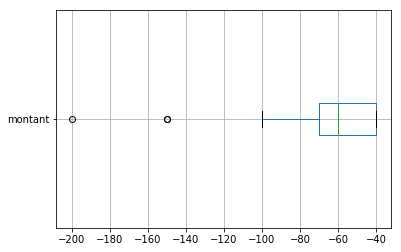

--------------------
TELEPHONE
moy:
 -15.519210526315794
med:
 -10.0
mod:
 0   -10.0
dtype: float64
var:
 100.4266335872576
ect:
 10.021308975740524


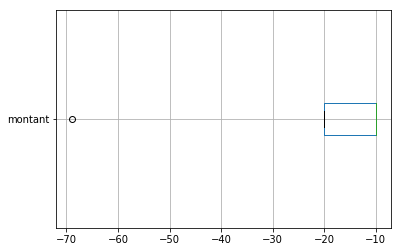

--------------------
RETOUR SECU
moy:
 11.753333333333334
med:
 16.5
mod:
 0   -29.24
1   -26.67
2    11.50
3    12.50
4    16.50
5    17.32
6    22.57
7    31.57
8    49.73
dtype: float64
var:
 573.6526666666666
ect:
 23.951047297908847


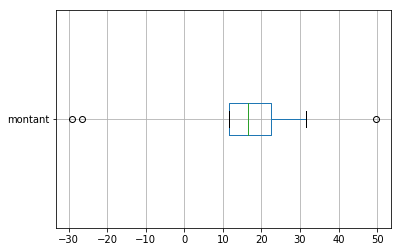

In [42]:
# -----------------------------
# GRAPHIQUE DE TYPE PLOTBOX
# ----------------------------
for cat in data["categ"].unique():
    subset = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean()) 
    print("med:\n",subset['montant'].median()) 
    print("mod:\n",subset['montant'].mode()) 
    print("var:\n",subset['montant'].var(ddof=0)) #variance empirique (ddof variable pour definir estimation corrigée)
    print("ect:\n",subset['montant'].std(ddof=0)) # ecart-type empirique
    #subset["montant"].hist()
    #plt.show()
    subset.boxplot(column="montant", vert=False) # delimitation quartile (vert determine position verticale)
    plt.show()

--------------------
COURSES FRAIS
skw:
 -0.30704419416491846
kur:
 -0.24967909052621495


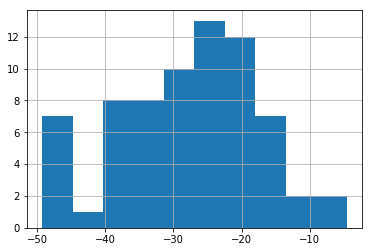

--------------------
REVENUS
skw:
 -4.261333619421559
kur:
 19.54800547881511


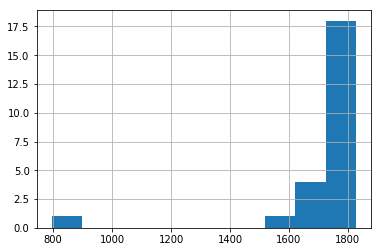

--------------------
AUTRE
skw:
 5.836600052739654
kur:
 104.57283801071067


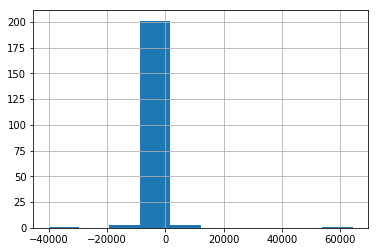

--------------------
COURSES
skw:
 -3.4614779770752073
kur:
 20.56768810429788


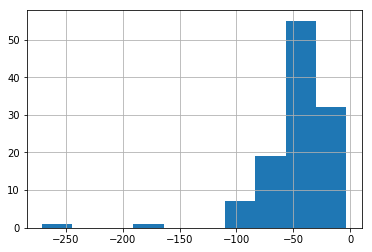

--------------------
JUNKFOOD
skw:
 -2.2493297460683643
kur:
 6.892482750459079


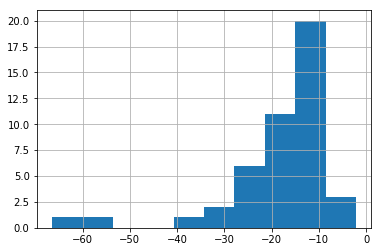

--------------------
BAR
skw:
 -3.6799254811029196
kur:
 19.808295438790196


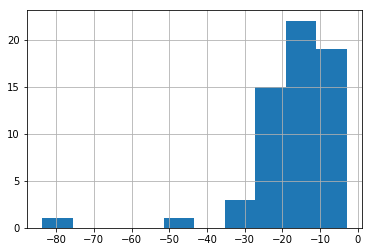

--------------------
ACHAT
skw:
 -2.9850201530856193
kur:
 10.121266867876209


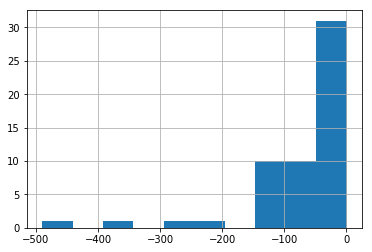

--------------------
TRANSPORT
skw:
 0.41886577802686625
kur:
 0.03331561245848391


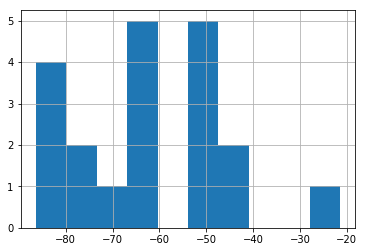

--------------------
RETRAIT LIQUIDE
skw:
 -1.8589012715012905
kur:
 3.0088178834957353


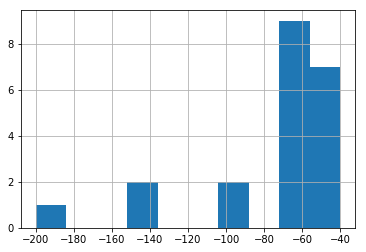

--------------------
TELEPHONE
skw:
 -4.099069163498769
kur:
 21.226979267163387


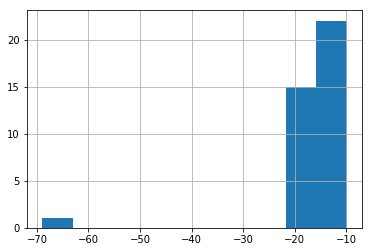

--------------------
RETOUR SECU
skw:
 -0.603025795479978
kur:
 0.09316348999510904


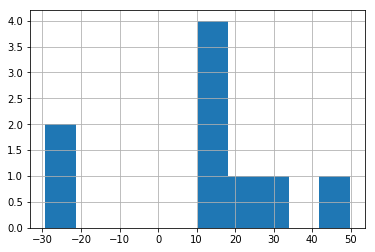

In [44]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("skw:\n",subset['montant'].skew()) #skewness empirique (asymetrie par rapport au meanvalue)
    print("kur:\n",subset['montant'].kurtosis())# aplattissement par rapport a courbe de gauss)
    subset["montant"].hist()
    plt.show()
    # voir aussi moment empiriqie : general, simple et centré

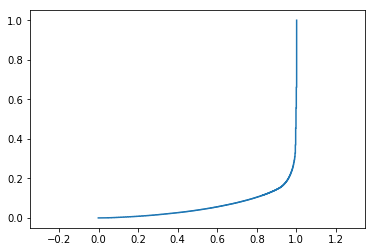

In [13]:
import numpy as np
# Courbe de lorenz
depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values #rend valeurs positives
n = len(dep)

lorenz = np.cumsum(np.sort(dep)) / dep.sum() #somme cumulée croissante et normalisées
#print(lorenz)
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
# creation de l'abssice
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [19]:
# INDICE DE GINI : ecart par rapport a une repartition type bissectrice parfaite
# Surface sous la courbe de Lorenz. 
# Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, 
# on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 

S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.874978919864071